**Brain Tumor Classification**

Brain is one of the vital organs in the human body, which consists of billions of cells. The abnormal group of cell is formed from the uncontrolled division of cells, which is also called as tumor. Brain tumor are divided into two types such malignant (stage1) and benign (stage2) tumor. Low grade brain tumor is called as benign. Similarly, the high grade tumor is also called as malignant. Benign tumor is not cancerous tumor. Hence it doesn’t spread other parts of the brains. However the malignant tumor is a cancerous tumor. So it spreads rapidly with indefinite boundaries to other region of the body easily. It leads to immediate death.

Based on the image data build a Deep Learning model that can predict whether it can classify the image as of tumor image or a normal image.

**Task1: Load the required libraries**


In [1]:
import cv2
import os

**Task2: List the directory to read the data**

In [2]:

folder_path = '/kaggle/input/brain-tumor-classification/yes'
        
# Train the model on the two persons' images
tumor= []
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if gray is not None:
        tumor.append(gray)


In [3]:

folder_path = '/kaggle/input/brain-tumor-classification/no'
        
# Train the model on the two persons' images
no_tumor= []
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if gray is not None:
        no_tumor.append(gray)



In [4]:
import matplotlib.pyplot as plt

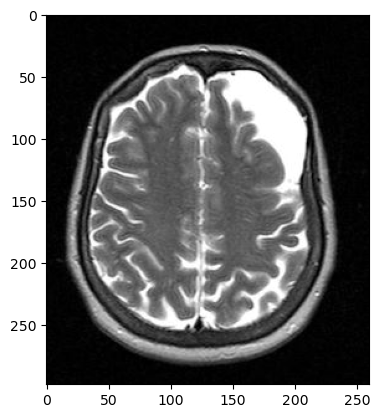

In [5]:
plt.imshow(tumor[0],cmap='gray')

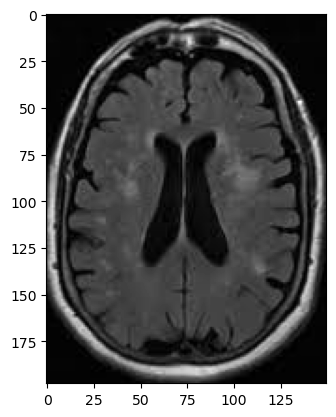

In [6]:
plt.imshow(no_tumor[0],cmap='gray')

**Encode the levels of target**

In [7]:
labels = ['tumor'] * len(tumor) + ['no_tumor'] * len(no_tumor)

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
target=label_encoder.fit_transform(labels)


In [9]:
from keras.utils import to_categorical

# Assuming y_train and y_test are integer label arrays
target = to_categorical(target, num_classes=2)


In [10]:
import numpy as np

In [11]:
images = np.array(tumor+no_tumor)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [12]:
images.shape

(253,)

In [13]:
images = images/255

In [14]:
images.shape

(253,)

In [15]:
resized_images = []
for image in images:
    resized_image = cv2.resize(image, (128, 128))
    resized_images.append(resized_image)
resized_images = np.array(resized_images)

CNN MODEL

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adamax
from tensorflow import keras




In [17]:
# Define model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), padding='same', input_shape=(128, 128, 1)))
model.add(keras.layers.Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(2,2), padding='same'))
model.add(keras.layers.Activation('selu'))
model.add(Conv2D(64, kernel_size=(2,2), padding='same'))
model.add(keras.layers.Activation('selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adamax(), metrics=['accuracy'])


 Split the data to train & test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(resized_images,target,test_size=0.2,random_state=101)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0], 128, 128, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 128, 128, 1))


Fit the model with 30 epochs & batch size as 40

In [21]:
fit_model=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=40)

Epoch 1/30
6/6 [==============================] - 10s 1s/step - loss: 54.2841 - accuracy: 0.5644 - val_loss: 8.3263 - val_accuracy: 0.5490
Epoch 2/30
6/6 [==============================] - 8s 1s/step - loss: 22.9270 - accuracy: 0.7574 - val_loss: 10.2404 - val_accuracy: 0.5490
Epoch 3/30
6/6 [==============================] - 8s 1s/step - loss: 13.8212 - accuracy: 0.8168 - val_loss: 4.8578 - val_accuracy: 0.6078
Epoch 4/30
6/6 [==============================] - 8s 1s/step - loss: 11.9300 - accuracy: 0.7228 - val_loss: 3.3372 - val_accuracy: 0.6471
Epoch 5/30
6/6 [==============================] - 8s 1s/step - loss: 6.2646 - accuracy: 0.7475 - val_loss: 2.4498 - val_accuracy: 0.6863
Epoch 6/30
6/6 [==============================] - 8s 1s/step - loss: 7.0189 - accuracy: 0.7624 - val_loss: 1.5524 - val_accuracy: 0.7647
Epoch 7/30
6/6 [==============================] - 10s 2s/step - loss: 5.7489 - accuracy: 0.7574 - val_loss: 1.6389 - val_accuracy: 0.7647
Epoch 8/30
6/6 [==================

**Task10: Plot the training & Validation loss values**

In [22]:
import matplotlib.pyplot as plt

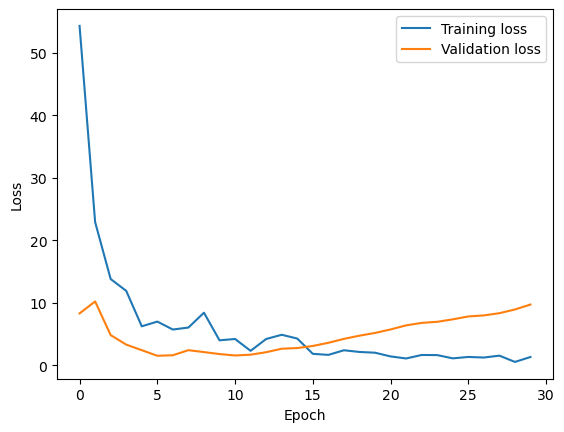

In [23]:
plt.plot(fit_model.history['loss'], label='Training loss')
plt.plot(fit_model.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Task11: Pass an image from 'no' folder and the check the model predictions**

In [24]:

from PIL import Image
import numpy as np


In [25]:
def pred(path):
  image = Image.open(path).convert('L')

  image = image.resize((128,128))
  image = np.array(image)

  # Normalize the image
  image = image / 255.0

  # Add a new dimension to the image array to make it compatible with the input shape of the model
  image = np.expand_dims(image, axis=0)

  prediction = model.predict(image)[0]
  class_labels = ['Non-tumor', 'Tumor']

  # Get the predicted class label
  predicted_class_index = np.argmax(prediction)
  predicted_class = class_labels[predicted_class_index]

  # Print the predicted class and the predicted probability
  print('Predicted class:', predicted_class)
  print('Predicted probability:', prediction[predicted_class_index])
  

In [26]:
pred('/kaggle/input/brain-tumor-classification/no/24 no.jpg')

1/1 [==============================] - 0s 176ms/step
Predicted class: Tumor
Predicted probability: 0.8016568


**Task11: Pass an image from 'yes' folder and the check the model predictions**

In [27]:
pred('/kaggle/input/brain-tumor-classification/yes/Y108.jpg')

1/1 [==============================] - 0s 51ms/step
Predicted class: Non-tumor
Predicted probability: 0.9795066
